In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt


## **Project: E-Commerce User Clusterization & Product Recommendation**

### **Goals:**
- **Optimize Advertisement Banner Effectiveness**
  - Determine whether **internal product promotions** or **external CPC-based ads** generate higher revenue.
  - Develop a data-driven strategy to **maximize banner space profitability**.

- **Cluster Users Based on Behavior**
  - Segment users by **engagement, purchase behavior, and product preferences**.
  - Identify **high-value customers** vs. **low-engagement users** to tailor marketing efforts.

- **Recommend the Most Relevant Products for Each Cluster**
  - Improve **conversion rates** by dynamically selecting the best product banners.
  - Personalize banner content based on **user segmentation insights**.

- **Implement Machine Learning for User Segmentation**
  - Apply clustering algorithms to **group similar users**.

- **Add Personalized Product Recommendations in API**
  - Integrate the clustering model into an **API endpoint** for **real-time product suggestions**.


### **Table of Contents**  

1. **Objective & Problem Statement**  

2. **Data Preprocessing & Feature Engineering**   

3. **Exploratory Data Analysis (EDA) & Visualization**   

4. **User Clusterization Model**  

5. **Analysis, Proposal, and Next Steps**  
   - Compare **internal banner revenue vs. external CPC revenue**.  
   - Recommend product categories per cluster to **maximize conversions**.  

6. **API Integration for Product Recommendations**  


## 1. **Objective & Problem Statement**  

#### **Context**  
An **online store for sporting goods** sells **clothing, shoes, accessories, and sports nutrition**.  

- The **main page features banners** to stimulate sales.  
- Currently, **one of five banners is randomly displayed**, each advertising either **a specific product or the entire company**.  
- **Marketers believe** that banner effectiveness may vary by **user segment** and that its performance depends on **user behavior characteristics**.  

---

#### **Acknowledgements**  
The **company manager** received an **offer from partners** to sell the banner space for advertising another service.  
- The proposed **payment model is CPC (Cost Per Click)**.  

---

#### **Objective**  
Help the manager **evaluate the effectiveness of the banner space** by determining:  
1. **Should the banner space continue promoting internal products** (measured by conversions/orders after a banner is shown)?  
2. **Or should the space be sold to external advertisers** under a CPC model?  

---

#### **Assumption**  
- The assumed **CPC (Cost Per Click) rate** is **$0.50 per click**.  


#### **Data Structure**

- **`order_id`** → Unique purchase number.  
- **`user_id`** → Unique customer identifier.  
- **`page_id`** → Unique page number for an event bundle.  
- **`product`** → Product associated with a **banner display or purchase**.  
- **`site_version`** → Version of the site (**mobile** or **desktop**).  
- **`time`** → Timestamp of the action.  
- **`title`** → Type of event (**show, click, or purchase**).  
- **`target`** → Indicates a **purchase event target**.  


## 2. **Data Preprocessing & Feature Engineering**   

In [27]:
df = pd.read_csv("product.csv")

In [28]:
df

,order_id,user_id,page_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:58:18,banner_show,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:59:15,banner_click,0
...,...,...,...,...,...,...,...,...
8471215,70c275428b8d53eef294d0529253b694,59e736f90b5f8003072bf0eb271ddb86,7bc3a33568d00773d5b58d6c7348bf3e,accessories,desktop,2019-05-23 14:07:00,banner_show,0
8471216,94c9a2a0c11c2b88e49c13e401608c86,69d73bfcaaa83217c903627e602ae01c,f236830bcbb2d279c0c7c3d7f5d3a970,clothes,mobile,2019-05-28 08:10:20,banner_show,0
8471217,862568e6013bc378b06f43c3e466521a,61728d26a9c9feb9e128c17b400062c8,4fc14437e418f19200e71acf4f34b3ba,sports_nutrition,mobile,2019-05-20 09:20:50,banner_show,0
8471218,7c70b42806372ba85f47a3956f23a114,f90e8c3bcf3867e65d62a2a08189a35a,c6a3e7758b9c0a43417c4a2c1a4504dd,sneakers,mobile,2019-05-28 19:25:42,banner_show,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471220 entries, 0 to 8471219
Data columns (total 8 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   order_id      object
 1   user_id       object
 2   page_id       object
 3   product       object
 4   site_version  object
 5   time          object
 6   title         object
 7   target        int64 
dtypes: int64(1), object(7)
memory usage: 517.0+ MB


In [29]:
df.shape

(8471220, 8)

In [30]:
df.head()

,order_id,user_id,page_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:58:18,banner_show,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:59:15,banner_click,0


In [31]:
df.isnull().sum()

order_id        0
user_id         0
page_id         0
product         0
site_version    0
time            0
title           0
target          0
dtype: int64

In [32]:
df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.date
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day_of_week'] = df['time'].dt.dayofweek
df['day'] = df['time'].dt.day_of_year
df['hour'] = df['time'].dt.hour

In [33]:
df

,order_id,user_id,page_id,product,site_version,time,title,target,date,year,month,day_of_week,day,hour
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,2019-01-11 09:24:43,banner_click,0,2019-01-11,2019,1,4,11,9
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,2019-01-09 09:38:51,banner_show,0,2019-01-09,2019,1,2,9,9
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0,2019-01-09,2019,1,2,9,9
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:58:18,banner_show,0,2019-01-03,2019,1,3,3,8
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:59:15,banner_click,0,2019-01-03,2019,1,3,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8471215,70c275428b8d53eef294d0529253b694,59e736f90b5f8003072bf0eb271ddb86,7bc3a33568d00773d5b58d6c7348bf3e,accessories,desktop,2019-05-23 14:07:00,banner_show,0,2019-05-23,2019,5,3,143,14
8471216,94c9a2a0c11c2b88e49c13e401608c86,69d73bfcaaa83217c903627e602ae01c,f236830bcbb2d279c0c7c3d7f5d3a970,clothes,mobile,2019-05-28 08:10:20,banner_show,0,2019-05-28,2019,5,1,148,8
8471217,862568e6013bc378b06f43c3e466521a,61728d26a9c9feb9e128c17b400062c8,4fc14437e418f19200e71acf4f34b3ba,sports_nutrition,mobile,2019-05-20 09:20:50,banner_show,0,2019-05-20,2019,5,0,140,9
8471218,7c70b42806372ba85f47a3956f23a114,f90e8c3bcf3867e65d62a2a08189a35a,c6a3e7758b9c0a43417c4a2c1a4504dd,sneakers,mobile,2019-05-28 19:25:42,banner_show,0,2019-05-28,2019,5,1,148,19


In [34]:
recency_df = df.groupby('user_id')['date'].agg(
    recency=lambda x: (x.max() - x.min()).days,
    visit_count='count',  # Number of times a user visited
    last_visit='max',  # Latest visit date
    first_visit='min'  # First visit date
).reset_index()



In [35]:
recency_df

,user_id,recency,visit_count,last_visit,first_visit
0,0000023f507999464aa2b78875b7e5d6,0,1,2019-05-14,2019-05-14
1,000009891526c0ade7180f8423792063,0,1,2019-05-26,2019-05-26
2,00000ce845c00cbf0686c992fc369df4,0,1,2019-04-27,2019-04-27
3,00000f7264c27ba6fea0c837ed6aa0aa,0,1,2019-05-19,2019-05-19
4,0000104cd168386a335ba6bf6e32219d,80,4,2019-04-12,2019-01-22
...,...,...,...,...,...
4254614,ffffe3323c6b5c056c19b2722c9aacbc,0,2,2019-04-09,2019-04-09
4254615,fffff8d603b897bb8655858430adfe40,23,8,2019-05-15,2019-04-22
4254616,fffff9055756ed29a5aa13ee8e222ac8,0,2,2019-03-31,2019-03-31
4254617,fffffa6bed6b7780465149fab05cf406,13,3,2019-01-28,2019-01-15


In [36]:
df = df.merge(recency_df, on = 'user_id', how = 'left')

In [37]:
df_copy = df.copy()


df_copy = df_copy.drop(columns = ['date', 'year', 'month', 'day_of_week', 'day', 'hour'])

In [38]:
df_copy['count'] = 1 
df_copy_pivot = df_copy.pivot_table(
    index = ['order_id','user_id', 'site_version', 'page_id', 'title', 'target'],
    columns = 'product',
    values= 'count',
    aggfunc='sum',
    fill_value = 0 
).reset_index()

df_copy_pivot.columns.name = None


df_copy_pivot

,order_id,user_id,site_version,page_id,title,target,accessories,clothes,company,sneakers,sports_nutrition
0,0000023f507999464aa2b78875b7e5d6,b86251d3be61f38938d5201e0d2f9297,mobile,7a6565e8c696f89d749934df5796a7c3,banner_show,0,0,1,0,0,0
1,000009891526c0ade7180f8423792063,58579e10e713b76c869b4bf800df1aa3,desktop,b480e9c127f7f39863200b366facb42f,banner_show,0,0,0,0,1,0
2,00000ce845c00cbf0686c992fc369df4,60d30091c1186e2033213e1062cda50e,mobile,b1ceecd33125e83609c97edaee0760b8,banner_click,0,0,0,1,0,0
3,00000f7264c27ba6fea0c837ed6aa0aa,7840647b0a875270f7f3e30ddb33c3ba,mobile,5c069c5da90f3239806558894be4955a,banner_show,0,0,0,1,0,0
4,0000104cd168386a335ba6bf6e32219d,90dcdf54d61e0b4e309e7233ef9da9ca,mobile,65fc774050de20434fb71d0036274cf5,banner_show,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8471215,fffff9055756ed29a5aa13ee8e222ac8,e3a1777800f3744691f6bf239b3f828c,mobile,7cc9f083fba084d83acbc58fc9e5a110,banner_show,0,0,0,1,0,0
8471216,fffffa6bed6b7780465149fab05cf406,0d3781835da392f6e8faaa492173a381,mobile,590e8af400fa32c69d1b773fc6b28aa3,banner_show,0,0,0,0,1,0
8471217,fffffcc42d1bf7ab742a4fa2d820f9f0,ddda44a044ae9ccf56fc9d40c2de8d40,mobile,354d949070e6310e86a28b940aabe510,banner_show,0,0,0,0,0,1
8471218,fffffe8705a636d6eaafe31c91de68ba,0f2f585e5c9ca16b747a99a265851f9f,mobile,8e88102633962b35e732f38d0fac52c1,banner_click,0,1,0,0,0,0


In [39]:
df_copy_pivot['unique_orders'] = df_copy_pivot.groupby('user_id')['order_id'].transform('nunique')
df_copy_pivot['unique_pages'] = df_copy_pivot.groupby('user_id')['page_id'].transform('nunique')


In [40]:
def site_version_distribution_calculation(df):
    """
    Calculate the distribution of product visibility on desktop or mobile for each specific user.

    Parameters:
    df (pd.DataFrame): A DataFrame containing at least the columns 'user_id' and 'site_version',
                       where 'site_version' represents the platform (e.g., desktop or mobile).

    Returns:
    pd.DataFrame: A DataFrame with 'user_id' as the index and columns representing the share of 
                  each 'site_version' (e.g., site_version_share_desktop, site_version_share_mobile).
    """
    site_version_counts = df.groupby(['user_id', 'site_version']).size().reset_index(name = 'count')
    total_counts = df.groupby('user_id')['site_version'].count().reset_index(name = 'total_counts')                             
    site_version_share = site_version_counts.merge(total_counts, on = 'user_id')
    site_version_share['site_version_share'] = site_version_share['count']/site_version_share['total_counts']
    
    site_version_share_pivot = site_version_share.pivot(index = 'user_id',
                                                        columns = 'site_version',
                                                        values = 'site_version_share').fillna(0)
    
    site_version_share_pivot.columns = [f'site_version_share_{col}' for col in site_version_share_pivot.columns]
    
    site_version_share_pivot.reset_index(inplace = True)
    return site_version_share_pivot


def calculate_conversion_rate(grouped, category, metric):
    """
    Calculate conversion rate based on a given metric and category.

    Parameters:
    grouped (pd.DataFrame): A DataFrame containing aggregated interaction data per user.
    category (str): The product category (e.g., 'accessories', 'clothes', etc.).
    metric (str): The conversion metric to calculate. Supported values:
                  - 'viewed_to_click': banner clicks divided by banner views
                  - 'viewed_to_order': orders divided by banner views
                  - 'clicked_to_order': orders divided by banner clicks

    Returns:
    pd.Series: A Series containing the computed conversion rate for the given category and metric.

    Raises:
    ValueError: If an unknown metric is provided.
    """
    if metric == 'viewed_to_click':
        return (grouped[f'banner_click_{category}'] / grouped[f'banner_show_{category}'].replace(0, np.nan)).fillna(0)
    elif metric == 'viewed_to_order':
        return (grouped[f'order_{category}'] / grouped[f'banner_show_{category}'].replace(0, np.nan)).fillna(0)
    elif metric == 'clicked_to_order':
        return (grouped[f'order_{category}'] / grouped[f'banner_click_{category}'].replace(0, np.nan)).fillna(0)
    else:
        raise ValueError(f"Unknown conversion metric: {metric}")




def calculate_user_metrics(df):
    """
    Calculate user interaction metrics, including banner interactions and conversion rates.

    Parameters:
    df (pd.DataFrame): A DataFrame containing user interaction data with at least the following columns:
                       - 'user_id': Unique identifier for each user.
                       - 'site_version': Platform version (desktop or mobile).
                       - 'title': Action performed (e.g., 'banner_show', 'banner_click', 'order').
                       - Columns representing product categories with interaction counts.

    Returns:
    pd.DataFrame: A DataFrame aggregated at the 'user_id' level, including:
                  - Total interactions (banner shows, clicks, orders) per category.
                  - Conversion rates (viewed_to_click, viewed_to_order, clicked_to_order).
                  - Site version distribution.
    """
    
    df_copy = df.copy()

    product_categories_columns = ['accessories', 'clothes', 'sneakers', 'sports_nutrition']

    
    for category in product_categories_columns:
        for action in ['banner_show', 'banner_click', 'order']:
            interaction_col = f'{action}_{category}'
            if interaction_col in df_copy.columns:
                raise ValueError(f"Column {interaction_col} already exists in the DataFrame.")
            
            df_copy[interaction_col] = np.where(
                (df_copy['title'] == action) & (df_copy[category] > 0), 1, 0
            )



    # Aggregate by user_id while preserving non-numerical columns
    grouped = df_copy.groupby('user_id', as_index=False).agg({
        'site_version': 'first',  
        'title': 'first',  
        **{col: 'sum' for col in df_copy.columns if col.startswith(('banner_', 'order_'))}
    })

    
    for category in product_categories_columns:
        grouped[f'banner_click_{category}'] = np.minimum(
            grouped[f'banner_click_{category}'], grouped[f'banner_show_{category}']
        )
        grouped[f'order_{category}'] = np.minimum(
            grouped[f'order_{category}'], grouped[f'banner_click_{category}']
        )

       

    conversion_metrics = ['viewed_to_click', 'viewed_to_order', 'clicked_to_order']
    for category in product_categories_columns:
        for metric in conversion_metrics:
            metric_col = f'{metric}_{category}'
            grouped[metric_col] = calculate_conversion_rate(grouped, category, metric)

    site_version_share = site_version_distribution_calculation(df_copy)
    grouped = grouped.merge(site_version_share,
                            on = 'user_id',
                            how = 'left')
    
    return grouped


In [41]:
convertion_df = calculate_user_metrics(df_copy_pivot)

In [42]:
convertion_df

,user_id,site_version,title,order_id,banner_show_accessories,banner_click_accessories,order_accessories,banner_show_clothes,banner_click_clothes,order_clothes,...,viewed_to_order_clothes,clicked_to_order_clothes,viewed_to_click_sneakers,viewed_to_order_sneakers,clicked_to_order_sneakers,viewed_to_click_sports_nutrition,viewed_to_order_sports_nutrition,clicked_to_order_sports_nutrition,site_version_share_desktop,site_version_share_mobile
0,0000023f507999464aa2b78875b7e5d6,desktop,banner_show,eb57f32a646ec2bd9c6725a85e8bc03b,1,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,000009891526c0ade7180f8423792063,mobile,banner_show,7628fb882a96b42d8bbfa1ecd2932599,0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,00000ce845c00cbf0686c992fc369df4,desktop,banner_show,275d2d45916c32c74e32893af200be9c,0,0,0,1,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,00000f7264c27ba6fea0c837ed6aa0aa,desktop,banner_show,998ee74e3a33dfd9eb57de4451f3e4a2,0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0000104cd168386a335ba6bf6e32219d,desktop,banner_show,14790ffc07acd5a7e74db60c0fde74101a27283963e686...,1,0,0,1,1,1,...,1.0,1.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4254614,ffffe3323c6b5c056c19b2722c9aacbc,mobile,banner_click,01d8aec7ac005fd7a8429a256a0dd5d9df6ad7d8ca8d0a...,0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4254615,fffff8d603b897bb8655858430adfe40,mobile,banner_show,2df3dbf6b8e3b180c2e26e497a64b02bbeb2050c70db4b...,1,1,0,0,0,0,...,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4254616,fffff9055756ed29a5aa13ee8e222ac8,mobile,banner_show,217fc110ab71e626cd6fa97aee98dbcd5d9e14f1678813...,0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4254617,fffffa6bed6b7780465149fab05cf406,mobile,banner_show,0790d48907bcf89bc74b81eb5b341d16a1d58ca35e790e...,0,0,0,1,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
recency_df

,user_id,recency,visit_count,last_visit,first_visit
0,0000023f507999464aa2b78875b7e5d6,0,1,2019-05-14,2019-05-14
1,000009891526c0ade7180f8423792063,0,1,2019-05-26,2019-05-26
2,00000ce845c00cbf0686c992fc369df4,0,1,2019-04-27,2019-04-27
3,00000f7264c27ba6fea0c837ed6aa0aa,0,1,2019-05-19,2019-05-19
4,0000104cd168386a335ba6bf6e32219d,80,4,2019-04-12,2019-01-22
...,...,...,...,...,...
4254614,ffffe3323c6b5c056c19b2722c9aacbc,0,2,2019-04-09,2019-04-09
4254615,fffff8d603b897bb8655858430adfe40,23,8,2019-05-15,2019-04-22
4254616,fffff9055756ed29a5aa13ee8e222ac8,0,2,2019-03-31,2019-03-31
4254617,fffffa6bed6b7780465149fab05cf406,13,3,2019-01-28,2019-01-15


In [54]:
merged_df = convertion_df.merge(recency_df, on = 'user_id', how = 'left')
merged_df

,user_id,site_version,title,order_id,banner_show_accessories,banner_click_accessories,order_accessories,banner_show_clothes,banner_click_clothes,order_clothes,...,clicked_to_order_sneakers,viewed_to_click_sports_nutrition,viewed_to_order_sports_nutrition,clicked_to_order_sports_nutrition,site_version_share_desktop,site_version_share_mobile,recency,visit_count,last_visit,first_visit
0,0000023f507999464aa2b78875b7e5d6,desktop,banner_show,eb57f32a646ec2bd9c6725a85e8bc03b,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,1,2019-05-14,2019-05-14
1,000009891526c0ade7180f8423792063,mobile,banner_show,7628fb882a96b42d8bbfa1ecd2932599,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,1,2019-05-26,2019-05-26
2,00000ce845c00cbf0686c992fc369df4,desktop,banner_show,275d2d45916c32c74e32893af200be9c,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,1,2019-04-27,2019-04-27
3,00000f7264c27ba6fea0c837ed6aa0aa,desktop,banner_show,998ee74e3a33dfd9eb57de4451f3e4a2,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,1,2019-05-19,2019-05-19
4,0000104cd168386a335ba6bf6e32219d,desktop,banner_show,14790ffc07acd5a7e74db60c0fde74101a27283963e686...,1,0,0,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,80,4,2019-04-12,2019-01-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4254614,ffffe3323c6b5c056c19b2722c9aacbc,mobile,banner_click,01d8aec7ac005fd7a8429a256a0dd5d9df6ad7d8ca8d0a...,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0,2,2019-04-09,2019-04-09
4254615,fffff8d603b897bb8655858430adfe40,mobile,banner_show,2df3dbf6b8e3b180c2e26e497a64b02bbeb2050c70db4b...,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,23,8,2019-05-15,2019-04-22
4254616,fffff9055756ed29a5aa13ee8e222ac8,mobile,banner_show,217fc110ab71e626cd6fa97aee98dbcd5d9e14f1678813...,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,2,2019-03-31,2019-03-31
4254617,fffffa6bed6b7780465149fab05cf406,mobile,banner_show,0790d48907bcf89bc74b81eb5b341d16a1d58ca35e790e...,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,13,3,2019-01-28,2019-01-15


In [55]:
final_df = merged_df.merge(df[['user_id', 'year', 'month', 'day_of_week', 'day', 'hour']],on = 'user_id', how = 'left')
final_df

,user_id,site_version,title,order_id,banner_show_accessories,banner_click_accessories,order_accessories,banner_show_clothes,banner_click_clothes,order_clothes,...,site_version_share_mobile,recency,visit_count,last_visit,first_visit,year,month,day_of_week,day,hour
0,0000023f507999464aa2b78875b7e5d6,desktop,banner_show,eb57f32a646ec2bd9c6725a85e8bc03b,1,0,0,0,0,0,...,0.0,0,1,2019-05-14,2019-05-14,2019,5,1,134,18
1,000009891526c0ade7180f8423792063,mobile,banner_show,7628fb882a96b42d8bbfa1ecd2932599,0,0,0,0,0,0,...,1.0,0,1,2019-05-26,2019-05-26,2019,5,6,146,6
2,00000ce845c00cbf0686c992fc369df4,desktop,banner_show,275d2d45916c32c74e32893af200be9c,0,0,0,1,0,0,...,0.0,0,1,2019-04-27,2019-04-27,2019,4,5,117,14
3,00000f7264c27ba6fea0c837ed6aa0aa,desktop,banner_show,998ee74e3a33dfd9eb57de4451f3e4a2,0,0,0,0,0,0,...,0.0,0,1,2019-05-19,2019-05-19,2019,5,6,139,16
4,0000104cd168386a335ba6bf6e32219d,desktop,banner_show,14790ffc07acd5a7e74db60c0fde74101a27283963e686...,1,0,0,1,1,1,...,0.0,80,4,2019-04-12,2019-01-22,2019,1,1,22,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8471215,fffff9055756ed29a5aa13ee8e222ac8,mobile,banner_show,217fc110ab71e626cd6fa97aee98dbcd5d9e14f1678813...,0,0,0,0,0,0,...,1.0,0,2,2019-03-31,2019-03-31,2019,3,6,90,10
8471216,fffffa6bed6b7780465149fab05cf406,mobile,banner_show,0790d48907bcf89bc74b81eb5b341d16a1d58ca35e790e...,0,0,0,1,0,0,...,1.0,13,3,2019-01-28,2019-01-15,2019,1,0,28,22
8471217,fffffa6bed6b7780465149fab05cf406,mobile,banner_show,0790d48907bcf89bc74b81eb5b341d16a1d58ca35e790e...,0,0,0,1,0,0,...,1.0,13,3,2019-01-28,2019-01-15,2019,1,1,15,11
8471218,fffffa6bed6b7780465149fab05cf406,mobile,banner_show,0790d48907bcf89bc74b81eb5b341d16a1d58ca35e790e...,0,0,0,1,0,0,...,1.0,13,3,2019-01-28,2019-01-15,2019,1,4,25,2


In [56]:
order_columns = [
    "order_accessories",
    "order_clothes",
    "order_sneakers",
    "order_sports_nutrition"
]


final_df["has_ordered"] = (final_df[order_columns].sum(axis=1) > 0).astype(int)

In [57]:
# Calculate total orders per user
user_orders = final_df.groupby('user_id')[['order_accessories', 'order_clothes', 'order_sneakers', 'order_sports_nutrition']].sum()
user_orders['total_orders'] = user_orders.sum(axis=1)  
user_orders = user_orders.reset_index()  # Reset index for merging


In [60]:
user_orders

,user_id,order_accessories,order_clothes,order_sneakers,order_sports_nutrition,total_orders
0,0000023f507999464aa2b78875b7e5d6,0,0,0,0,0
1,000009891526c0ade7180f8423792063,0,0,0,0,0
2,00000ce845c00cbf0686c992fc369df4,0,0,0,0,0
3,00000f7264c27ba6fea0c837ed6aa0aa,0,0,0,0,0
4,0000104cd168386a335ba6bf6e32219d,0,4,0,0,4
...,...,...,...,...,...,...
4254614,ffffe3323c6b5c056c19b2722c9aacbc,0,0,0,0,0
4254615,fffff8d603b897bb8655858430adfe40,0,0,0,0,0
4254616,fffff9055756ed29a5aa13ee8e222ac8,0,0,0,0,0
4254617,fffffa6bed6b7780465149fab05cf406,0,0,0,0,0


In [62]:
final_df = final_df.merge(user_orders[['user_id','total_orders']], on='user_id', how='left')
final_df.head()

,user_id,site_version,title,order_id,banner_show_accessories,banner_click_accessories,order_accessories,banner_show_clothes,banner_click_clothes,order_clothes,...,visit_count,last_visit,first_visit,year,month,day_of_week,day,hour,has_ordered,total_orders
0,0000023f507999464aa2b78875b7e5d6,desktop,banner_show,eb57f32a646ec2bd9c6725a85e8bc03b,1,0,0,0,0,0,...,1,2019-05-14,2019-05-14,2019,5,1,134,18,0,0
1,000009891526c0ade7180f8423792063,mobile,banner_show,7628fb882a96b42d8bbfa1ecd2932599,0,0,0,0,0,0,...,1,2019-05-26,2019-05-26,2019,5,6,146,6,0,0
2,00000ce845c00cbf0686c992fc369df4,desktop,banner_show,275d2d45916c32c74e32893af200be9c,0,0,0,1,0,0,...,1,2019-04-27,2019-04-27,2019,4,5,117,14,0,0
3,00000f7264c27ba6fea0c837ed6aa0aa,desktop,banner_show,998ee74e3a33dfd9eb57de4451f3e4a2,0,0,0,0,0,0,...,1,2019-05-19,2019-05-19,2019,5,6,139,16,0,0
4,0000104cd168386a335ba6bf6e32219d,desktop,banner_show,14790ffc07acd5a7e74db60c0fde74101a27283963e686...,1,0,0,1,1,1,...,4,2019-04-12,2019-01-22,2019,1,1,22,12,1,4


In [88]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471220 entries, 0 to 8471219
Data columns (total 48 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   user_id                            object        
 1   site_version                       object        
 2   title                              object        
 3   order_id                           object        
 4   banner_show_accessories            int64         
 5   banner_click_accessories           int64         
 6   order_accessories                  int64         
 7   banner_show_clothes                int64         
 8   banner_click_clothes               int64         
 9   order_clothes                      int64         
 10  banner_show_sneakers               int64         
 11  banner_click_sneakers              int64         
 12  order_sneakers                     int64         
 13  banner_show_sports_nutrition       int64         
 14  ba

## 3. **Exploratory Data Analysis (EDA) & Visualization**  

In [146]:
final_df.describe()

: 

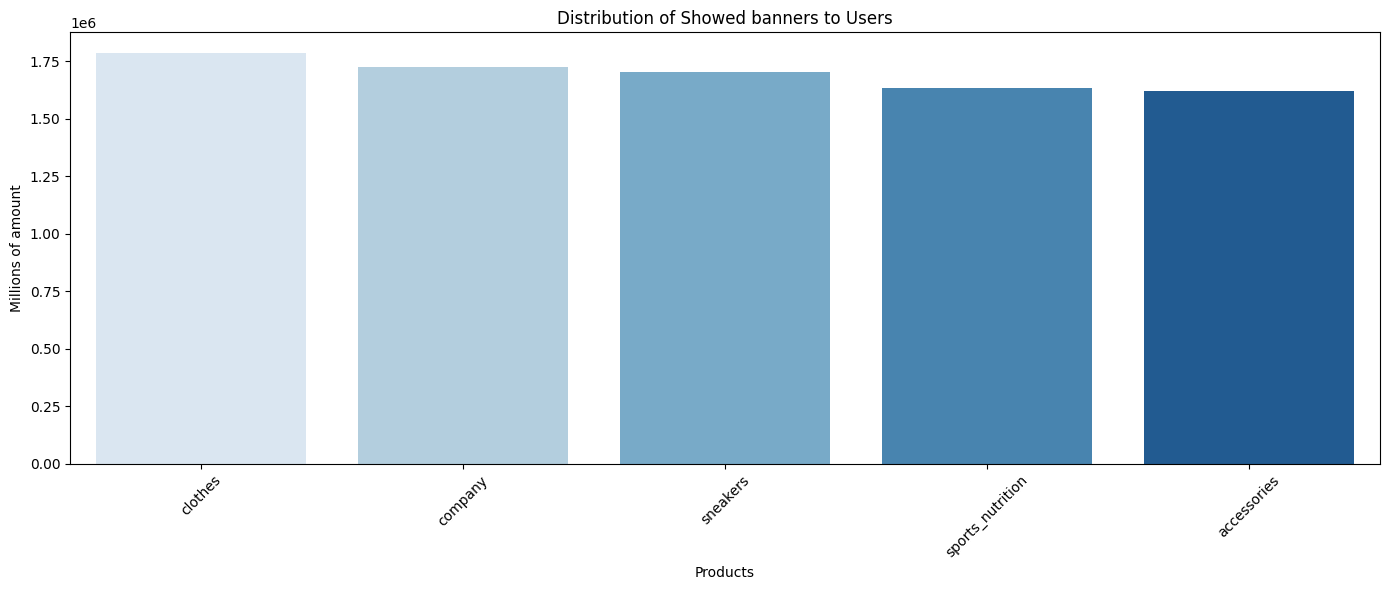

In [90]:
product_counts = df['product'].value_counts().reset_index()
product_counts.columns = ['product', 'frequency']

plt.figure(figsize=(14, 6))
sns.barplot(x='product', y='frequency', data=product_counts, palette='Blues', hue='product', legend=False)
plt.xlabel('Products')
plt.ylabel('Millions of amount')
plt.title('Distribution of Showed banners to Users')
plt.xticks(rotation=45) 
plt.tight_layout() 


plt.show()


<Figure size 1400x600 with 0 Axes>

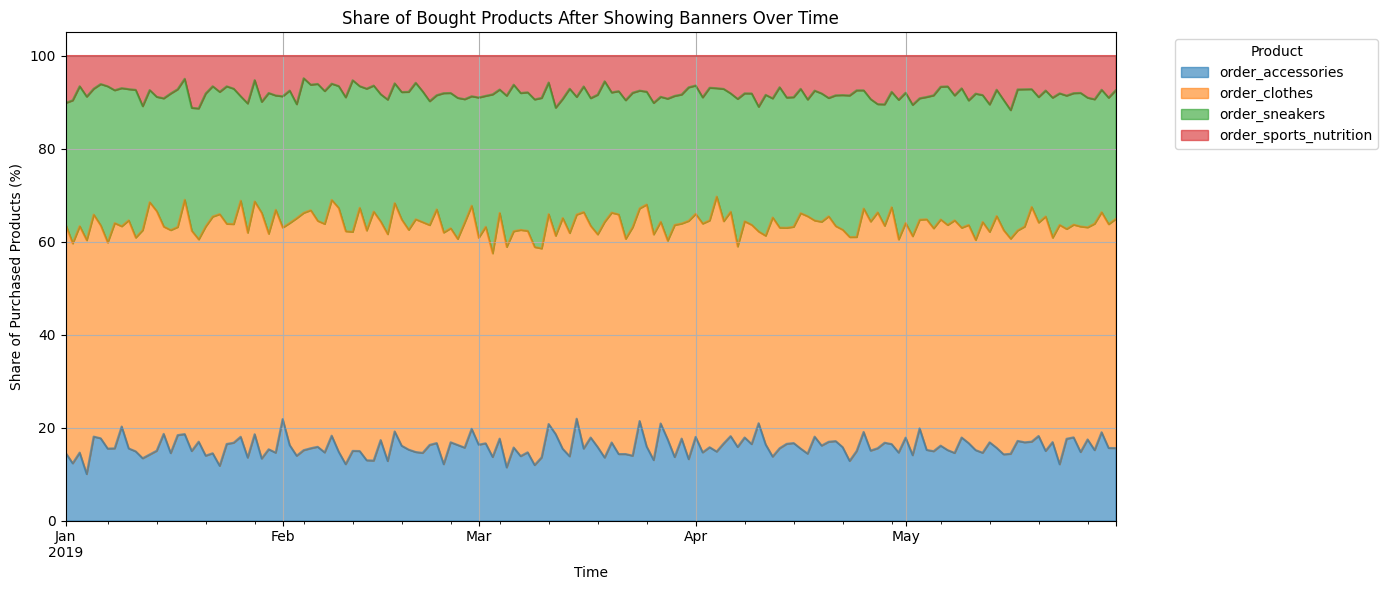

In [89]:
# Share of bought products 
bought_products = final_df[final_df['target'] == 1]

# Calculate the share of each product over time
product_share_over_time = bought_products.groupby(['time', 'product']).size().unstack(fill_value=0)

# Convert to percentage share over total purchases for each time period
product_share_over_time = product_share_over_time.div(product_share_over_time.sum(axis=1), axis=0) * 100

# Plot: Share of Bought Products Over Time
plt.figure(figsize=(14, 6))
product_share_over_time.plot(kind='area', stacked=True, figsize=(14, 6), alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Share of Purchased Products (%)')
plt.title('Share of Bought Products After Showing Banners Over Time')
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


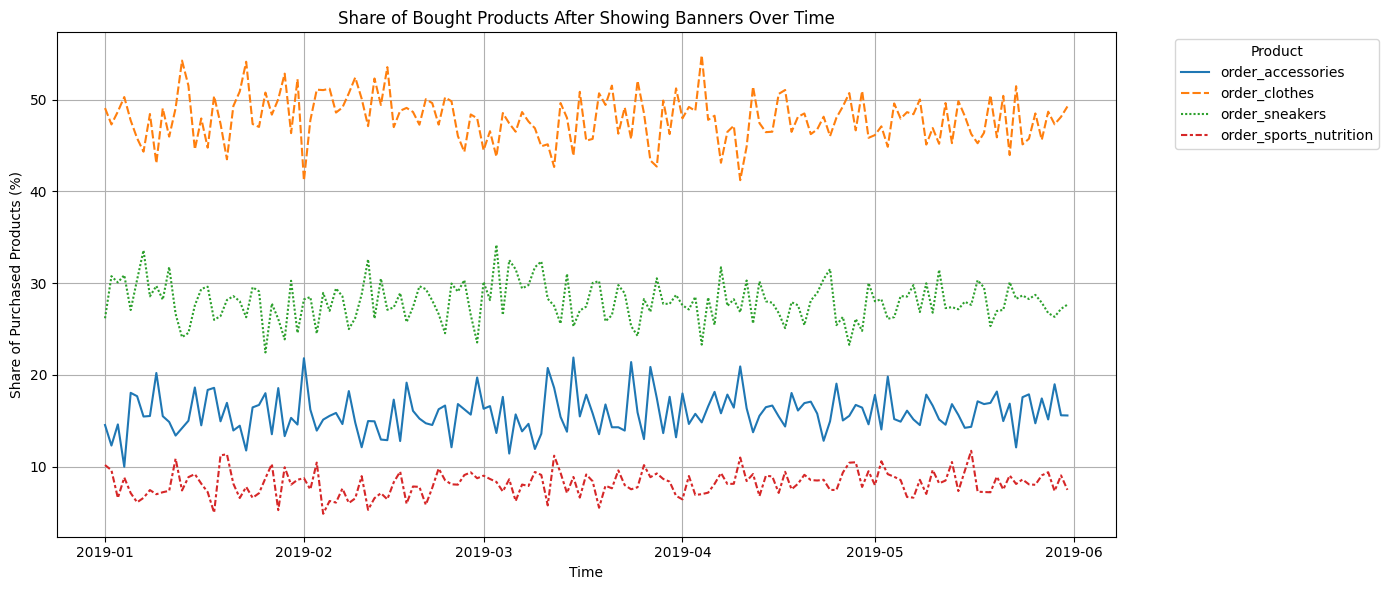

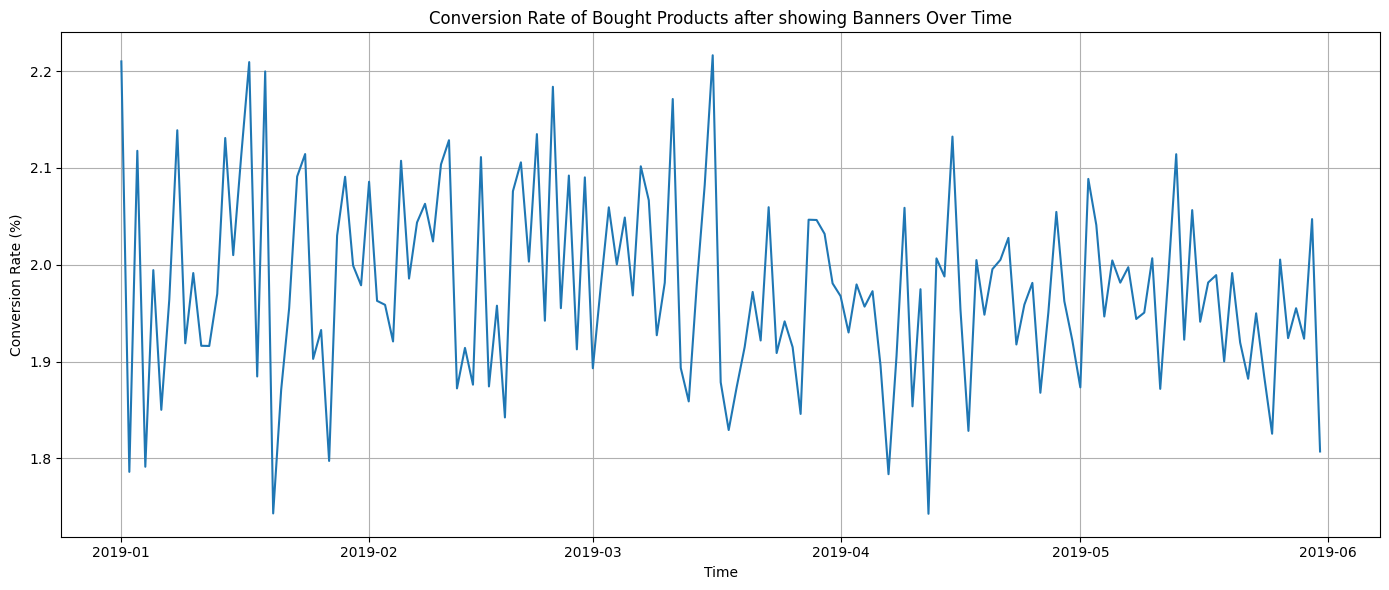

In [96]:
# Plot: Conversion Rate Over Time
bought_products = final_df[final_df['target'] == 1]

# Calculate the share of each product over time
product_share_over_time = bought_products.groupby(['time', 'product']).size().unstack(fill_value=0)

# Convert to percentage share over total purchases for each time period
product_share_over_time = product_share_over_time.div(product_share_over_time.sum(axis=1), axis=0) * 100

# Plot: Share of Bought Products Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(data=product_share_over_time)
plt.xlabel('Time')
plt.ylabel('Share of Purchased Products (%)')
plt.title('Share of Bought Products After Showing Banners Over Time')
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Conversion Rate Over Time
conversion_rate_over_time = final_df.groupby('time').agg(
    total_conversions=('target', 'sum'),
    total_interactions=('user_id', 'count')
).reset_index()

conversion_rate_over_time['conversion_rate'] = (conversion_rate_over_time['total_conversions'] / 
                                                conversion_rate_over_time['total_interactions']) * 100

plt.figure(figsize=(14, 6))
sns.lineplot(x='time', y='conversion_rate', data=conversion_rate_over_time)
plt.xlabel('Time')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate of Bought Products after showing Banners Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


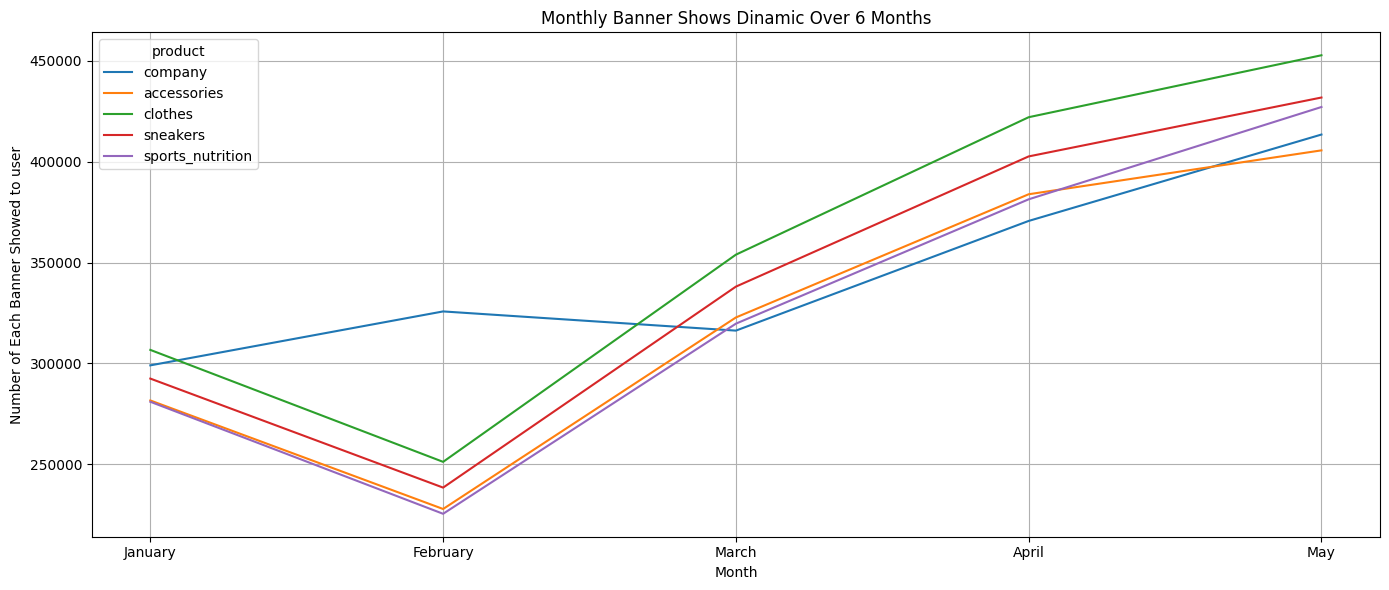

In [91]:
df['month_name'] = df['time'].dt.strftime('%B')
monthly_orders = df.groupby(['month_name', 'product'])['order_id'].nunique().reset_index()

monthly_orders = monthly_orders.rename(columns = {'order_id' : 'total_orders'})

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']

monthly_orders['month_name'] = pd.Categorical(monthly_orders['month_name'], categories = months_order, ordered = True)

monthly_orders =  monthly_orders.sort_values('month_name').reset_index(drop = True)


plt.figure(figsize=(14, 6))

sns.lineplot(x='month_name', y='total_orders', hue='product', data = monthly_orders)
plt.xlabel('Month')
plt.ylabel('Number of Each Banner Showed to user')
plt.title('Monthly Banner Shows Dinamic Over 6 Months')
plt.grid(True)
 
#plt.xticks(ticks=range(1, 6))
plt.tight_layout() 

plt.show()

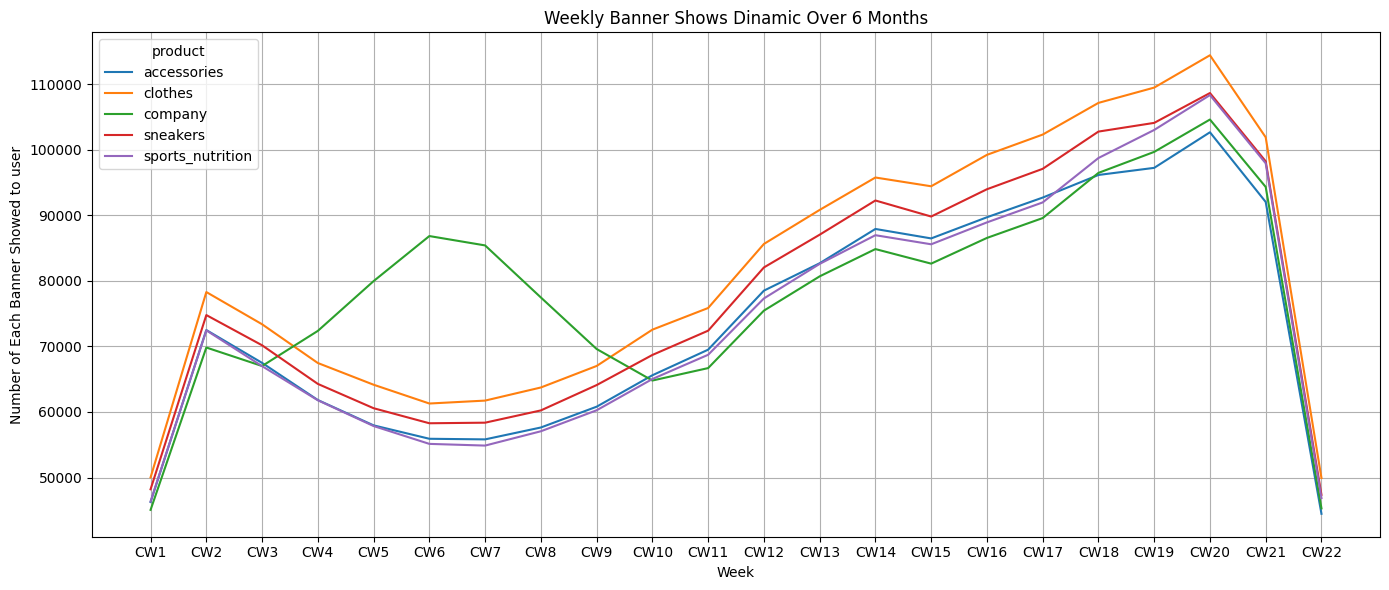

In [92]:
weekly_orders = df.set_index('time').groupby('product').resample('W')['order_id'].count().reset_index()
weekly_orders = weekly_orders.rename(columns = {'order_id' : 'total_orders'})
weekly_orders['week_name'] = 'CW' + (weekly_orders.groupby('product').cumcount() +1).astype(str)

plt.figure(figsize=(14, 6))

sns.lineplot(x='week_name', y='total_orders', hue='product', data = weekly_orders)
plt.xlabel('Week')
plt.ylabel('Number of Each Banner Showed to user')
plt.title('Weekly Banner Shows Dinamic Over 6 Months')
plt.grid(True)
 
#plt.xticks(ticks=range(1, 6))
plt.tight_layout() 

plt.show()


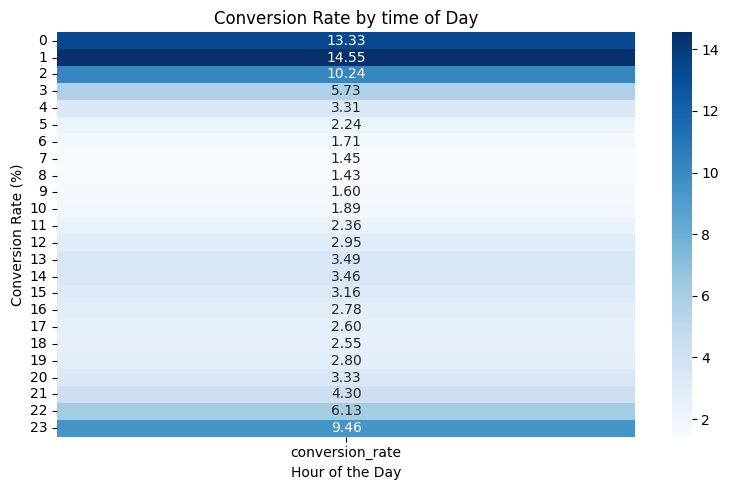

In [87]:
hourly_conversion = df.groupby('hour').agg(
    total_conversions = ('target', 'sum'),
    total_interactions = ('user_id', 'count')
).reset_index()

hourly_conversion['conversion_rate'] = hourly_conversion['total_conversions']/ hourly_conversion['total_interactions'] 

plt.figure(figsize=(8, 5))

sns.heatmap(hourly_conversion.set_index('hour')[['conversion_rate']] * 100, cmap='Blues', annot=True, fmt=".2f")

plt.title('Conversion Rate by time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Conversion Rate (%)')

plt.tight_layout()
plt.show()

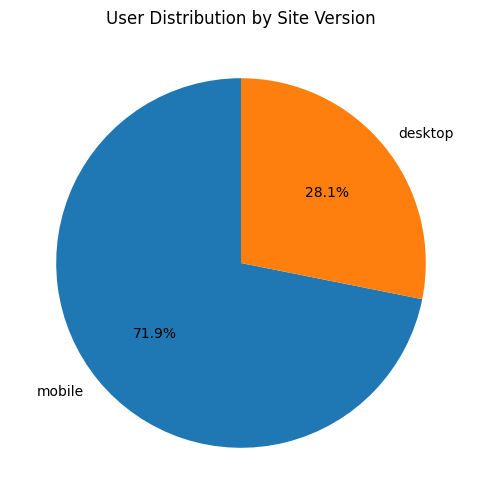

In [93]:
plt.figure(figsize=(6, 6))
site_version_counts = final_df["site_version"].value_counts()
plt.pie(
    site_version_counts, labels=site_version_counts.index, autopct="%1.1f%%", startangle=90
)
plt.title("User Distribution by Site Version")
plt.show()

/var/folders/fy/v_csgbfs5292myngmd5dzk4m0000gn/T/ipykernel_66521/304121586.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_distribution.index, y=order_distribution.values, palette=['red', 'green'])


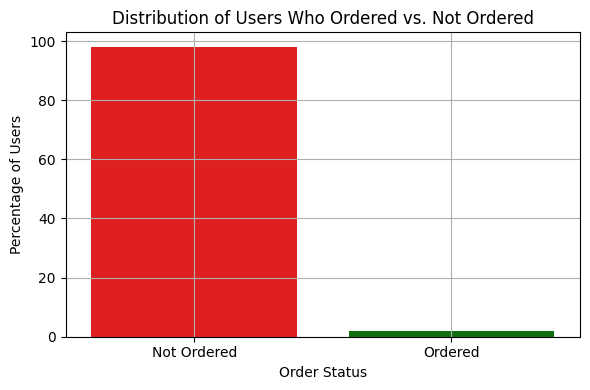

In [99]:

order_distribution = final_df['has_ordered'].value_counts(normalize=True) * 100

# Plot: Distribution of Users Who Ordered vs. Not Ordered
plt.figure(figsize=(6, 4))
sns.barplot(x=order_distribution.index, y=order_distribution.values, palette=['red', 'green'])
plt.xlabel('Order Status')
plt.ylabel('Percentage of Users')
plt.title('Distribution of Users Who Ordered vs. Not Ordered')
plt.xticks(ticks=[0, 1], labels=['Not Ordered', 'Ordered'])
plt.grid(True)
plt.tight_layout()
plt.show()


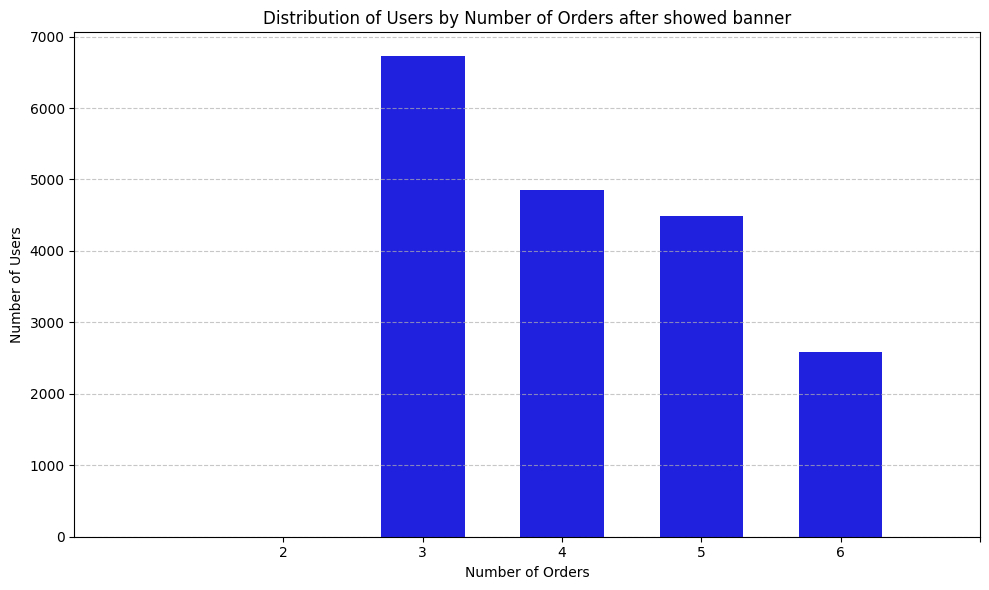

In [108]:

orders_count_distribution = final_df[(final_df['total_orders'] >= 1) & (final_df['total_orders'] <= 6)] \
    .groupby('total_orders')['user_id'].nunique().reset_index()
orders_count_distribution.columns = ['total_orders', 'user_count']


all_orders = pd.DataFrame({'total_orders': [1, 2, 3, 4, 5, 6]})
orders_count_distribution = all_orders.merge(orders_count_distribution, on='total_orders', how='left').fillna(0)

plt.figure(figsize=(10, 6))
sns.barplot(x='total_orders', y='user_count', data=orders_count_distribution, color='blue', width=0.6)

plt.xlabel('Number of Orders')
plt.ylabel('Number of Users')
plt.title('Distribution of Users by Number of Orders after showed banner')


plt.xticks(ticks=[1, 2, 3, 4, 5, 6])  
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Only horizontal grid

plt.tight_layout()
plt.show()


#### **Conclusion**  

1. **Low Post-Purchase Conversion (98%)**  
   - **98% of users did not buy a product shown after purchase** → Opportunity to segment users and propose personalized product recommendations.  

2. **Mobile Dominance (71.9%)**  
   - **71.9% of users prefer browsing on mobile** → Opportunity to improve mobile UX/UI for a smoother purchasing experience.  

3. **Peak Conversion Time (00:00 - 01:00 UTC)**  
   - Higher conversion rates observed between 00:00 - 01:00 UTC → Indicates a key shopping period when users are most engaged.  

4. **Continued Ordering Behavior**  
   - Some users continue ordering after an initial purchase → Suggests product usefulness → Opportunity to enhance their post-purchase experience.  

5. **Conversion Analysis Pending**  
   - Detailed conversion analysis will be conducted later to avoid duplication.  




## 4. **Customer Clusterization Model**  

In [109]:
df_ml = final_df.copy()

In [110]:
df_ml = df_ml.drop(columns = ['user_id', 'site_version', 'title', 'order_id', 'last_visit', 'first_visit'])
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471220 entries, 0 to 8471219
Data columns (total 42 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   banner_show_accessories            int64         
 1   banner_click_accessories           int64         
 2   order_accessories                  int64         
 3   banner_show_clothes                int64         
 4   banner_click_clothes               int64         
 5   order_clothes                      int64         
 6   banner_show_sneakers               int64         
 7   banner_click_sneakers              int64         
 8   order_sneakers                     int64         
 9   banner_show_sports_nutrition       int64         
 10  banner_click_sports_nutrition      int64         
 11  order_sports_nutrition             int64         
 12  viewed_to_click_accessories        float64       
 13  viewed_to_order_accessories        float64       
 14  cl

In [112]:
df_ml = df_ml.drop(columns = ['product', 'time', 'month_name', 'date'])

In [116]:
df_ml = df_ml.drop(columns = ['target', 'CTR_accessories', 'Conversion_accessories'])

In [117]:
df_ml.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471220 entries, 0 to 8471219
Data columns (total 35 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   banner_show_accessories            int64  
 1   banner_click_accessories           int64  
 2   order_accessories                  int64  
 3   banner_show_clothes                int64  
 4   banner_click_clothes               int64  
 5   order_clothes                      int64  
 6   banner_show_sneakers               int64  
 7   banner_click_sneakers              int64  
 8   order_sneakers                     int64  
 9   banner_show_sports_nutrition       int64  
 10  banner_click_sports_nutrition      int64  
 11  order_sports_nutrition             int64  
 12  viewed_to_click_accessories        float64
 13  viewed_to_order_accessories        float64
 14  clicked_to_order_accessories       float64
 15  viewed_to_click_clothes            float64
 16  viewed_to_order_cl

In [111]:
import gc
gc.collect()


133106

In [119]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define all features to scale
features = [
    "banner_show_accessories", "banner_click_accessories", "order_accessories",
    "banner_show_clothes", "banner_click_clothes", "order_clothes",
    "banner_show_sneakers", "banner_click_sneakers", "order_sneakers",
    "banner_show_sports_nutrition", "banner_click_sports_nutrition", "order_sports_nutrition",
    
    "viewed_to_click_accessories", "viewed_to_order_accessories", "clicked_to_order_accessories",
    "viewed_to_click_clothes", "viewed_to_order_clothes", "clicked_to_order_clothes",
    "viewed_to_click_sneakers", "viewed_to_order_sneakers", "clicked_to_order_sneakers",
    "viewed_to_click_sports_nutrition", "viewed_to_order_sports_nutrition", "clicked_to_order_sports_nutrition",
    
    "recency", "visit_count", "total_orders",
    "site_version_share_desktop", "site_version_share_mobile"
]

# Standardize all features
scaler = StandardScaler()
df_ml_scaled = pd.DataFrame(scaler.fit_transform(df_ml[features]), columns=features)

# Apply PCA with fixed n_components=3
pca = PCA(n_components=3, random_state=42, svd_solver="randomized")  
X_pca = pca.fit_transform(df_ml_scaled)

# Convert to DataFrame
X_final = pd.DataFrame(X_pca, columns=[f"PCA_{i+1}" for i in range(3)])

# Find the best k for clustering
best_k = None
best_score = -1

for k in range(2, 10):  
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=10000, n_init="auto")
    clusters = kmeans.fit_predict(X_final)
    
    # Compute silhouette score on a random sample
    score_sample_size = min(10000, len(X_final))
    sample_indices = X_final.sample(score_sample_size, random_state=42).index
    try:
        score = silhouette_score(X_final.iloc[sample_indices], clusters[sample_indices])
    except ValueError:
        score = -1  

    if score > best_score:
        best_score = score
        best_k = k

print(f'Best k: {best_k}')
print(f'Best silhouette score: {best_score}')

# Apply final clustering
kmeans_final = MiniBatchKMeans(n_clusters=best_k, random_state=42, batch_size=10000, n_init="auto")
df_ml["cluster"] = kmeans_final.fit_predict(X_final)

# Cluster Summary with Key Features
cluster_summary = df_ml.groupby("cluster").agg({
    "recency": "median",
    "visit_count": "mean",
    "total_orders": "mean",
    "site_version_share_desktop": "mean",
    "site_version_share_mobile": "mean",
    
    # Click and Order Behavior
    "viewed_to_click_clothes": "mean",
    "viewed_to_order_clothes": "mean",
    "clicked_to_order_clothes": "mean",
    "viewed_to_click_accessories": "mean",
    "viewed_to_order_accessories": "mean",
    "clicked_to_order_accessories": "mean",
    "viewed_to_click_sneakers": "mean",
    "viewed_to_order_sneakers": "mean",
    "clicked_to_order_sneakers": "mean",
    "viewed_to_click_sports_nutrition": "mean",
    "viewed_to_order_sports_nutrition": "mean",
    "clicked_to_order_sports_nutrition": "mean",
}).reset_index()


print(cluster_summary)


python(43730) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Best k: 4
Best silhouette score: 0.6234342293648529
   cluster  recency  visit_count  total_orders  site_version_share_desktop  \
0        0      6.0     2.714628      0.000000                    0.311178   
1        1     29.0     7.672919      1.075217                    0.089888   
2        2     34.0     8.825697      6.693725                    0.298360   
3        3     20.0     6.854614      0.456206                    0.085874   

   site_version_share_mobile  viewed_to_click_clothes  \
0                   0.688822                 0.067117   
1                   0.910112                 0.097138   
2                   0.701640                 0.720174   
3                   0.914126                 0.071493   

   viewed_to_order_clothes  clicked_to_order_clothes  \
0                 0.000000                  0.000000   
1                 0.000489                  0.000995   
2                 0.557608                  0.751738   
3                 0.000000                  0.0

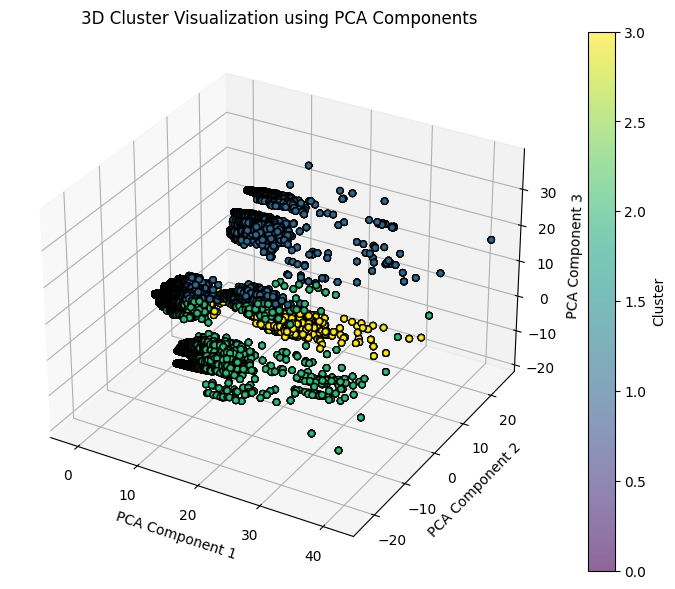

In [120]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


pca_1 = X_final["PCA_1"]
pca_2 = X_final["PCA_2"]
pca_3 = X_final["PCA_3"] 
clusters = df_ml["cluster"]


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(pca_1, pca_2, pca_3, c=clusters, cmap="viridis", alpha=0.6, edgecolors="k")


ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D Cluster Visualization using PCA Components")


cbar = plt.colorbar(sc)
cbar.set_label("Cluster")

plt.show()


In [121]:
cluster_summary

,cluster,recency,visit_count,total_orders,site_version_share_desktop,site_version_share_mobile,viewed_to_click_clothes,viewed_to_order_clothes,clicked_to_order_clothes,viewed_to_click_accessories,viewed_to_order_accessories,clicked_to_order_accessories,viewed_to_click_sneakers,viewed_to_order_sneakers,clicked_to_order_sneakers,viewed_to_click_sports_nutrition,viewed_to_order_sports_nutrition,clicked_to_order_sports_nutrition
0,0,6.0,2.714628,0.000000,0.311178,0.688822,0.067117,0.000000,0.000000,0.023469,0.000000,0.000000,0.002613,0.000000,0.000000,0.043827,0.000000,0.000000
1,1,29.0,7.672919,1.075217,0.089888,0.910112,0.097138,0.000489,0.000995,0.691385,0.060926,0.085769,0.028461,0.000979,0.001478,0.108315,0.030047,0.040845
2,2,34.0,8.825697,6.693725,0.298360,0.701640,0.720174,0.557608,0.751738,0.048781,0.000651,0.001989,0.064052,0.006277,0.009775,0.076305,0.007661,0.014681
3,3,20.0,6.854614,0.456206,0.085874,0.914126,0.071493,0.000000,0.000000,0.023759,0.000000,0.000000,0.605815,0.038380,0.053633,0.081395,0.000104,0.000176


In [38]:
cluster_summary.to_csv('cluster_summary.csv')

## 5. **Analysis, Proposal, and Next Steps**  

/var/folders/fy/v_csgbfs5292myngmd5dzk4m0000gn/T/ipykernel_66521/3416571179.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=12)
/var/folders/fy/v_csgbfs5292myngmd5dzk4m0000gn/T/ipykernel_66521/3416571179.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=12)
/var/folders/fy/v_csgbfs5292myngmd5dzk4m0000gn/T/ipykernel_66521/3416571179.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=12)
/var/folders/fy/v_csgbfs5292myngmd5dzk4m0000gn/T/ipykernel_66521/3416571179.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=12)


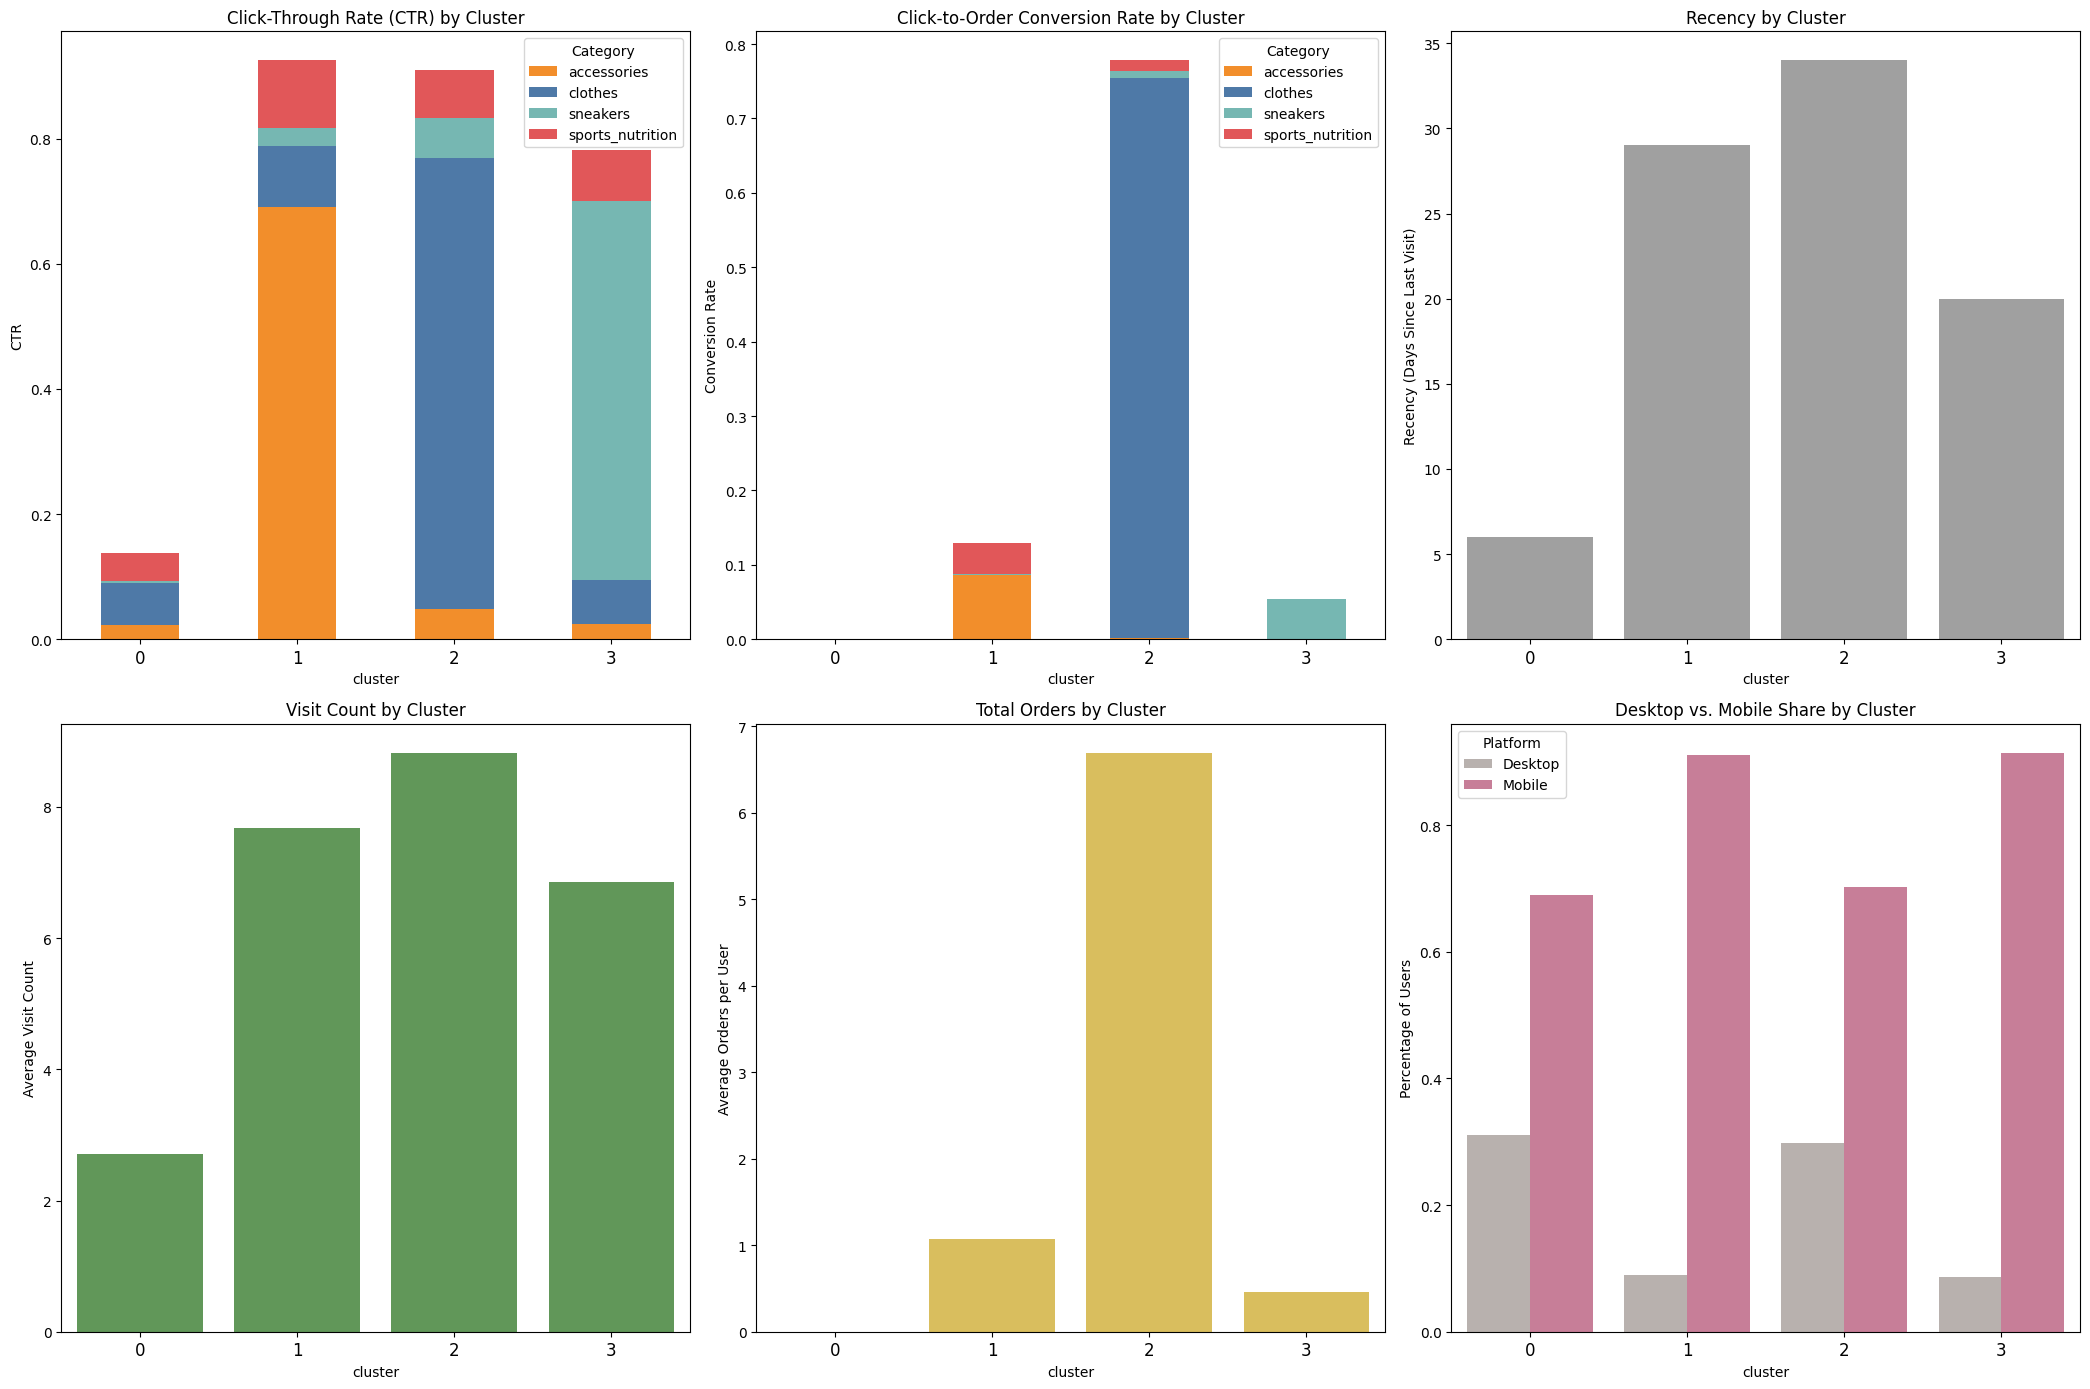

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


business_palette = {
    "clothes": "#4E79A7",  # Navy Blue
    "accessories": "#F28E2B",  # Warm Orange
    "sneakers": "#76B7B2",  # Teal
    "sports_nutrition": "#E15759",  # Muted Red
    "Recency": "#A0A0A0",  # Neutral Gray
    "Visits": "#59A14F",  # Green
    "Orders": "#EDC949",  # Yellow
    "Desktop": "#BAB0AC",  # Light Gray
    "Mobile": "#D37295"  # Pink
}

# Create visualization with properly stacked bars per product and additional metrics
fig, axes = plt.subplots(2, 3, figsize=(21, 14))  # Create a 2-row layout for extra charts

# Function to format x-axis labels
def format_x_labels(ax):
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=12)

# Click-Through Rate (CTR) per product (stacked bars)
ctr_data = cluster_summary.melt(id_vars=["cluster"], 
                                value_vars=["viewed_to_click_clothes", "viewed_to_click_accessories", 
                                            "viewed_to_click_sneakers", "viewed_to_click_sports_nutrition"],
                                var_name="Category", 
                                value_name="CTR")
ctr_data["Category"] = ctr_data["Category"].str.replace("viewed_to_click_", "")

pivot_ctr = ctr_data.pivot(index="cluster", columns="Category", values="CTR").fillna(0)
pivot_ctr.plot(kind='bar', stacked=True, color=[business_palette[c] for c in pivot_ctr.columns], ax=axes[0, 0])
axes[0, 0].set_title("Click-Through Rate (CTR) by Cluster")
axes[0, 0].set_ylabel("CTR")
format_x_labels(axes[0, 0])

# Click-to-Order Rate per product (stacked bars)
click_order_data = cluster_summary.melt(id_vars=["cluster"], 
                                        value_vars=["clicked_to_order_clothes", "clicked_to_order_accessories", 
                                                    "clicked_to_order_sneakers", "clicked_to_order_sports_nutrition"],
                                        var_name="Category", 
                                        value_name="Click-to-Order Rate")
click_order_data["Category"] = click_order_data["Category"].str.replace("clicked_to_order_", "")

pivot_click_order = click_order_data.pivot(index="cluster", columns="Category", values="Click-to-Order Rate").fillna(0)
pivot_click_order.plot(kind='bar', stacked=True, color=[business_palette[c] for c in pivot_click_order.columns], ax=axes[0, 1])
axes[0, 1].set_title("Click-to-Order Conversion Rate by Cluster")
axes[0, 1].set_ylabel("Conversion Rate")
format_x_labels(axes[0, 1])

# Recency by Cluster
sns.barplot(data=cluster_summary, x="cluster", y="recency", color=business_palette["Recency"], ax=axes[0, 2])
axes[0, 2].set_title("Recency by Cluster")
axes[0, 2].set_ylabel("Recency (Days Since Last Visit)")
format_x_labels(axes[0, 2])

# Visit Count Distribution by Cluster
sns.barplot(data=cluster_summary, x="cluster", y="visit_count", color=business_palette["Visits"], ax=axes[1, 0])
axes[1, 0].set_title("Visit Count by Cluster")
axes[1, 0].set_ylabel("Average Visit Count")
format_x_labels(axes[1, 0])

# Total Orders by Cluster
sns.barplot(data=cluster_summary, x="cluster", y="total_orders", color=business_palette["Orders"], ax=axes[1, 1])
axes[1, 1].set_title("Total Orders by Cluster")
axes[1, 1].set_ylabel("Average Orders per User")
format_x_labels(axes[1, 1])

# Desktop vs. Mobile Share by Cluster
desktop_mobile_data = cluster_summary.melt(id_vars=["cluster"], 
                                           value_vars=["site_version_share_desktop", "site_version_share_mobile"],
                                           var_name="Platform", 
                                           value_name="Share")
desktop_mobile_data["Platform"] = desktop_mobile_data["Platform"].str.replace("site_version_share_", "").str.capitalize()

sns.barplot(data=desktop_mobile_data, x="cluster", y="Share", hue="Platform", palette=[business_palette["Desktop"], business_palette["Mobile"]], ax=axes[1, 2])
axes[1, 2].set_title("Desktop vs. Mobile Share by Cluster")
axes[1, 2].set_ylabel("Percentage of Users")
format_x_labels(axes[1, 2])

plt.tight_layout()
plt.show()


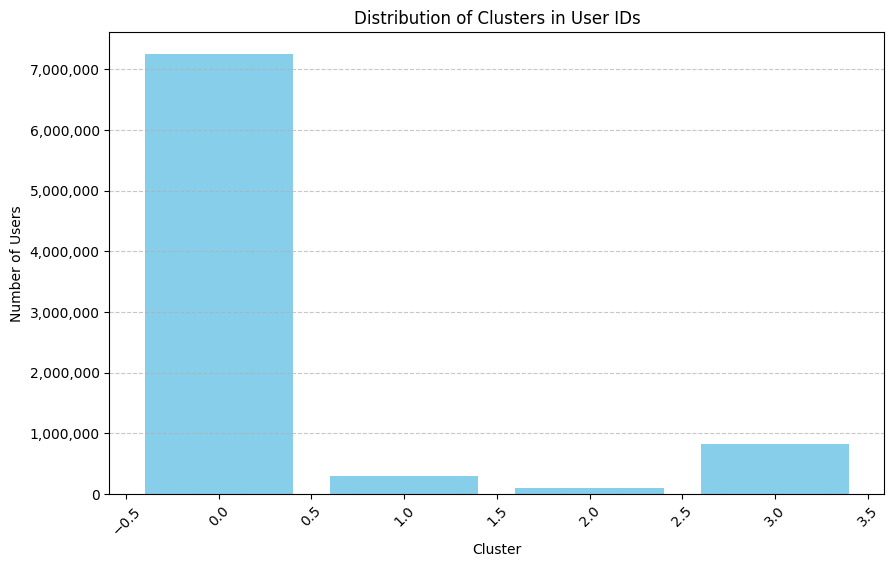

In [134]:

# Plotting the distribution

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


cluster_counts = df_ml['cluster'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.title('Distribution of Clusters in User IDs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))


plt.show()


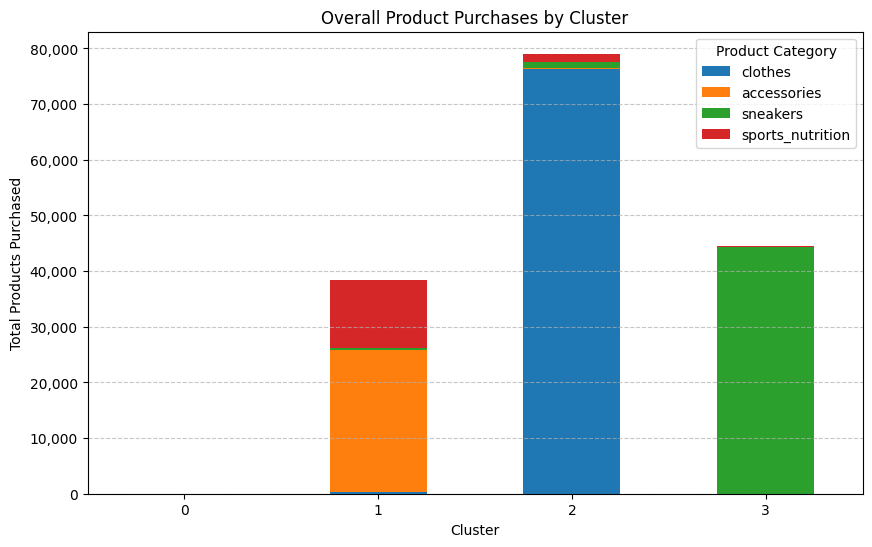

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

cluster_counts = df_ml['cluster'].value_counts()

overall_product_purchase = pd.DataFrame()

for cluster, count in cluster_counts.items():
    # Get the product rates for each cluster
    product_rates = cluster_summary[cluster_summary['cluster'] == cluster][[
        "clicked_to_order_clothes", "clicked_to_order_accessories", 
        "clicked_to_order_sneakers", "clicked_to_order_sports_nutrition"
    ]].values[0]
    
    # Create a new DataFrame to add the cluster's data
    overall_product_purchase = pd.concat([
        overall_product_purchase,
        pd.DataFrame({
            "cluster": cluster,
            "clothes": count * product_rates[0],
            "accessories": count * product_rates[1],
            "sneakers": count * product_rates[2],
            "sports_nutrition": count * product_rates[3],
            "user_count": count
        }, index=[0])
    ], ignore_index=True)

# Ensure the cluster column is in the correct order
overall_product_purchase['cluster'] = pd.Categorical(overall_product_purchase['cluster'], categories=[0, 1, 2, 3], ordered=True)

product_totals = overall_product_purchase.set_index("cluster")[[
    "clothes", "accessories", "sneakers", "sports_nutrition"
]]

product_totals = product_totals.sort_index()

product_totals.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Overall Product Purchases by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Products Purchased")
plt.legend(title="Product Category")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=0)
plt.show()


In [130]:
df_ml_copy = df_ml.copy()

In [ ]:
# Let's make assumtions that:
CPC = 0.5  # Cost per click from external advertisers
AOV = 50  # Assumed average order value ($) per completed order

# Calculate internal revenue (Product Promotion)
df_ml_copy["internal_revenue"] = (
    df_ml_copy["viewed_to_click_clothes"] * df_ml_copy["clicked_to_order_clothes"] +
    df_ml_copy["viewed_to_click_accessories"] * df_ml_copy["clicked_to_order_accessories"] +
    df_ml_copy["viewed_to_click_sneakers"] * df_ml_copy["clicked_to_order_sneakers"] +
    df_ml_copy["viewed_to_click_sports_nutrition"] * df_ml_copy["clicked_to_order_sports_nutrition"]
) * AOV  # Revenue generated per banner impression

# Calculate external revenue (Selling Banner Space)
df_ml_copy["external_revenue"] = df_ml_copy["viewed_to_click_clothes"] * CPC + \
                         df_ml_copy["viewed_to_click_accessories"] * CPC + \
                         df_ml_copy["viewed_to_click_sneakers"] * CPC + \
                         df_ml_copy["viewed_to_click_sports_nutrition"] * CPC

# Summarize total revenue from both models
total_internal_revenue = df_ml_copy["internal_revenue"].sum()
total_external_revenue = df_ml_copy["external_revenue"].sum()


total_internal_revenue, total_external_revenue


(5869870.277777783, 1003335.8948773445)

In [132]:
print('The Total Internal Revenue: ', total_internal_revenue)
print('The Total External: ', total_external_revenue)

The Total Internal Revenue:  5869870.277777783
The Total External:  1003335.8948773445


### 5.1 **Analysis of Advertising Strategies**

#### Key Finding

**Current advertising strategies** utilizing internal product banners have proven to be **5.85** times more effective.  

According to Bain & Company, companies that excel in customer segmentation achieve **10% higher profits** over a five-year period compared to those whose segmentation efforts are less effective.

##### 🔍 Sources  

- [Qualtrics - How Customer Segmentation Drives Revenue Growth](https://www.qualtrics.com/blog/how-best-buy-mercedes-benz-and-amex-used-segmentation-to-increase-revenue)  

- [MDPI - Customer Segmentation as a Revenue Generator](https://www.mdpi.com/2227-7390/11/21/4425)


### 5.2 **Proposal: User Clustering Insights**

#### **1. Overview of Clustering Results**
We have segmented users into different 4 clusters based on their behavioral patterns, engagement levels, and transactional history. The clustering approach aims to identify actionable insights that can drive business growth and improve customer targeting.

---

#### **2. Key Insights from Clustering**
##### **Cluster Distribution**
- The majority of users belong to **Cluster 0**, indicating a large segment with potentially low engagement.
- Smaller clusters (1, 2, 3) represent distinct user behaviors, possibly high-value or niche groups.

##### **Behavioral Trends**
- **Cluster 2:** Highest conversion rate and most orders per user, indicating high-value customers. These users prefer to buy Clothers and complementary product. Rarely they buy Sports Nutrition, Accesories and Sneakers.
- **Cluster 1:** Moderate engagement with a balanced visit count and conversion rate. These users prefer to buy Accessories and less Sports Nutrition.
- **Cluster 3:** Shows potential, with a decent number of visits but lower conversion. These users prefer to buy Sneakers. Rarely they buy Sports Nutrition, Clothers and Accesories. 
- **Cluster 0:** Low engagement, requiring an approach to activation.

##### **Recency & Platform Insights**
- **Cluster 2 has the longest recency**, meaning users in this segment buy less frequently but make significant purchases when they do.
- **Mobile dominance:** Clusters 1, 2, and 3 exhibit strong mobile user presence, indicating that mobile-first strategies are critical.

---

#### **3. Strategic Recommendations**
##### **Marketing & Engagement**
1. **Target Cluster 2 with Loyalty Programs**  
   - Offer personalized discounts, pairing products, early access to new products, or premium memberships.
   - Optimize email and push notifications to encourage repeat purchases.

2. **Reactivate Cluster 0 with Engagement Campaigns**  
   - Use retargeting ads and personalized email sequences.
   - Provide first-time purchase incentives or discounts.

3. **Experiment with A/B Testing for Cluster 3**  
   - Test UI/UX improvements on mobile for better conversion rates.
   - Introduce referral incentives to encourage organic growth.

---

##### **Product & UX Enhancements**
1. **Optimize Mobile Experience for High-Converting Clusters**  
   - Improve checkout experience with one-click payments.
   - Reduce friction in the mobile user journey.

2. **Dynamic Pricing for Cluster 2 Users**  
   - Explore personalized pricing strategies to increase AOV (Average Order Value).
   - Leverage predictive analytics to forecast their purchasing behavior.

3. **Introduce "Buy Now, Pay Later" (BNPL) for High-Value & Low-Conversion Clusters**  
   - Enable installment payment options for **Cluster 2 (high-value customers)** to increase AOV.
   - Offer BNPL for **Cluster 3 (low conversion users)** to lower barriers to purchase.
   - Highlight BNPL in checkout and banners for high-ticket items (Clothes, Sneakers, Sales and Premium Collections).


---

##### **Business Impact & Expected Results**
By implementing these strategies, we expect:
- **Increase in CLV (Customer Lifetime Value)** for high-value clusters.
- **Higher conversion rates** from improved user engagement.
- **Lower churn rates** among inactive users.
- **Revenue uplift** driven by targeted marketing and pricing adjustments.

---

##### **Next Steps**
1. Implement targeted campaigns and measure results over the next quarter.
2. Enhance mobile UI based on A/B testing results.
3. Monitor cluster performance and refine segmentation for continuous optimization.

---
## **Cluster-Specific Product Recommendations**

| **Cluster**  | **User Behavior** | **Top Purchased Categories** | **Recommended Banner Products** | **Justification** |
|-------------|------------------|----------------------------|--------------------------------|----------------|
| **Cluster 0** | Low engagement, high volume | Generic & low-cost items | **Best-selling, discount offers, first-time buyer bundles** | Users need activation; showcase trending/discounted items. <br> *This dataset does not include information on the most sold products. Additional data collection or integration with sales records is required to gain insights into top-performing products.* <br> The chart above shows that accessories and sports nutrition are purchased significantly in Cluster 1. <br> Cluster 1 has moderate engagement, meaning if these products work for them, they might also work for Cluster 0 (low engagement but potential for activation). <br> Accessories and sports nutrition are "entry-level" products compared to high-cost items like clothes or sneakers. <br> **Final Recommendation:** Choose **Accessories** due to their greater share in Cluster 1 purchases. |
| **Cluster 1** | Engaged but low conversion | Accessories, Sports Nutrition, Gym Gear, and rarely Sneakers | **Subscription-based products, workout plans, bundles** | Users engage with health-related items; subscriptions boost retention. |
| **Cluster 2** | High-value customers, high AOV | Clothes and complementary products | **Exclusive products, sales, premium collections, VIP perks** | Users are willing to spend more; highlight high-end and exclusive items. |
| **Cluster 3** | Engaged but low conversion | Sneakers | **Complementary accessories (socks, insoles, cleaning kits) and Subscription-based products, workout plans, bundles** | Users purchase sneakers; relevant add-ons increase value. |

---

#### **3. Banner Strategy per Cluster**
##### **Cluster 0 (Low Engagement Users)**
**Objective:** Reactivate users and encourage first-time purchases.  
- **Banner Type:** Discounts, flash sales, trending products.  
- **Message Example:** *“Trending Now: Best Sellers at 20% Off! Grab Yours Today!”*  
- **Products to Highlight:** Affordable, fast-moving items.

##### **Cluster 2 (Health & Fitness Enthusiasts)**
**Objective:** Encourage repeat purchases with subscriptions and bundles.  
- **Banner Type:** Sports Nutrition.  
- **Message Example:** *“Do not forget to replenish! Subscribe for Monthly Nutrition Packs!”*  
- **Products to Highlight:** Protein powders, gym gear bundles, monthly nutrition plans.

##### **Cluster 2 (High-Value Customers)**
**Objective:** Maximize AOV by showcasing premium, exclusive products.  
- **Banner Type:** Clothers and complementary product recommendations.  
- **Message Example:** *“Exclusive Drop: Limited Edition Clothers Just for You!”*  
- **Products to Highlight:** Luxury sneakers, premium clothing, early-access offers.

##### **Cluster 3 ( Accesouries Buyers)**
**Objective:** Increase basket size with accessories.  
- **Banner Type:** Sneakers and complementary product recommendations.  
- **Message Example:** *“Complete Your Look! Add These Must-Have Accessories!”*  
- **Products to Highlight:** Sneakers, shoe care kits, socks, insoles.

---

#### **4. Expected Business Impact**
**Higher Repeat Purchases:** According to research, personalized banner ads can increase conversion rates by ~10%.  By implementing personalized banners, we expect a statistically significant uplift in key marketing metrics, driving better ROI and overall effectiveness.
**Increased AOV:** Targeted product pairings drive upselling by +10-15%.  
**Reduced Churn:** Engaging banners help retain low-activity users by 5-10%.  

---
#### **5. Next Steps:**
✅ Step 1: Deploy personalized banners based on user cluster at checkout.
✔ Good step – Since we confirmed that internal banners are profitable, targeting by cluster will further maximize effectiveness.

✅ Step 2: A/B test banner variations to refine messaging and optimize CTR.
✔ Essential – A/B testing different banners can help optimize engagement and conversion rates.

✅ Step 3: A/B test banner with popular products for Cluster 0 and New Users.
✔ Excellent idea – Cluster 0 has low engagement, so showing popular or discounted products may increase conversions.

✅ Step 4: A/B test for "Buy Now, Pay Later" Feature.
✔ Relevant for high-value clusters – Testing this feature for Cluster 2 and possibly Cluster 3 will reveal whether it boosts conversions.

✅ Step 5: Track engagement metrics to assess effectiveness and iterate.
✔ Important – Continuous tracking ensures that improvements are data-driven.

✅ Step 6: Assessing Model Metrics and Relearning Model.
✔ Necessary – Relearning clustering models periodically is important since user behavior evolves over time.

## 6. **API Integration for Product Recommendations** 

In [144]:
df_ml['recommended_product'] = 'generic'

#Cluster-specific recommendation:

df_ml.loc[df_ml['cluster'] == 0, 'recommended_product'] = 'accessories'
df_ml.loc[df_ml['cluster'] == 1, 'recommended_product'] = 'accessories'
df_ml.loc[df_ml['cluster'] == 2, 'recommended_product'] = 'clothes'
df_ml.loc[df_ml['cluster'] == 3, 'recommended_product'] = 'sneakers'

In [145]:
df_ml.head()

,banner_show_accessories,banner_click_accessories,order_accessories,banner_show_clothes,banner_click_clothes,order_clothes,banner_show_sneakers,banner_click_sneakers,order_sneakers,banner_show_sports_nutrition,...,year,month,day_of_week,day,hour,has_ordered,total_orders,cluster,internal_revenue,recommended_product
0,1,0,0,0,0,0,0,0,0,0,...,2019,5,1,134,18,0,0,0,0.0,accessories
1,0,0,0,0,0,0,1,0,0,0,...,2019,5,6,146,6,0,0,0,0.0,accessories
2,0,0,0,1,0,0,0,0,0,0,...,2019,4,5,117,14,0,0,0,0.0,accessories
3,0,0,0,0,0,0,1,0,0,0,...,2019,5,6,139,16,0,0,0,0.0,accessories
4,1,0,0,1,1,1,0,0,0,0,...,2019,1,1,22,12,1,4,2,50.0,clothes


In [ ]:
#Creating FastAPI endpoint to send recommendated product after user segmentation

#pip install fastapi uvicorn pandas

from fastapi import FastAPI, HTTPException

import logging

logging.basicConfig(level=logging.INFO)

app = FastAPI()

@app.get("/recommend/{user_id}")

df_received = pd.read_csv("path.csv") # as an example

def recommend_product (user_id: str): 
  
    logging.info(f'Request for getting user id: {user_id} received.')
    if user_id not in df_received['user_id'].values :
        raise HTTPException(code = '404', detail = 'User not found')
    
    df_ml3 = df_received[df_received['user_id'] == 'user_id']
    recommend_product = df_ml3['recommended_product'].iloc[0]

    return {
        user_id: {user_id},
        recommend_product = {recommend_product}
    }
